## CLASSIFYING HANDWRITTEN DIGITS FROM THE MNIST DATASET USING CNN

In [61]:
# Importing necessary libraries

import tensorflow
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
from tensorflow.keras.datasets import mnist

In [63]:
# Loading the data and splitting it into train and test sets

(X_train, y_train), (X_test , y_test) = mnist.load_data()

In [64]:
# Training 60000 handwritten digits
# Testing dataset has 10000 handwritten digits

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [65]:
img = X_train[0]

In [66]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

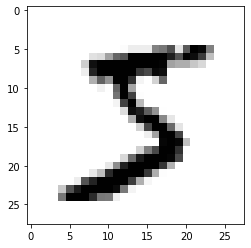

In [67]:
plt.imshow(img, cmap = 'binary')

In [68]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [69]:
y_train.shape

(60000,)

In [70]:
# ONE HOT ENCODING THE LABELS

from tensorflow.keras.utils import to_categorical

In [71]:
y_train_categorical = to_categorical(y_train,10)
y_test_categorical = to_categorical(y_test,10)

In [72]:
y_train_categorical[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [73]:
img.max()

255

In [74]:
img.min()

0

In [75]:
# RESCALING THE IMAMGE ARRAY SIZES TO LIE BETWEEN 0 AND 1

X_train = X_train/255

X_test = X_test/255

In [76]:
X_train.max()

1.0

In [78]:
X_train.min()

0.0

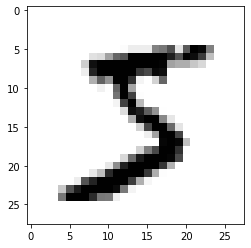

In [79]:
plt.imshow(X_train[0], cmap = 'binary')

In [81]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [82]:
# RESHAPING THE TRAINING AND TESTING DATASETS (INCLUDING THE COLOR CHANNEL(0))

X_train = X_train.reshape(60000,28,28,1)

X_test = X_test.reshape(10000,28,28,1)

In [83]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [84]:
# BUILDING THE CONVOLUTIONAL NEURAL NETWORK

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [85]:
classifier = Sequential()

In [86]:
classifier.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (28,28,1), activation = 'relu')) # Convolution Layer

classifier.add(MaxPool2D(pool_size = (2,2))) # Pooling Layer

classifier.add(Flatten()) # Flattening the array into a vector

classifier.add(Dense(units = 128, activation = 'relu')) # Fully connected Dense layer

classifier.add(Dense(units = 10, activation = 'softmax')) # Output Layer

classifier.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [87]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [88]:
classifier.fit(X_train, y_train_categorical, epochs=2)   # FITTING THE DATA TO THE CNN

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 28s 472us/sample - loss: 0.1307 - accuracy: 0.9599
Epoch 2/2
60000/60000 [==============================] - 24s 401us/sample - loss: 0.0475 - accuracy: 0.9856


In [89]:
classifier.metrics_names

['loss', 'accuracy']

In [90]:
# EVALUATING THE MODEL

classifier.evaluate(X_test, y_test_categorical)  

10000/10000 [==============================] - 1s 92us/sample - loss: 0.0400 - accuracy: 0.9872


[0.03996244970529224, 0.9872]

In [91]:
# PREDICTING ON THE TEST DATA

predictions = classifier.predict_classes(X_test)

In [92]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_test, predictions))  # MODEL HAS AN ACCURACY OF 99%

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## THE END